#**Income Restricted Housing**

In [1]:
# Import the necessary packages to process the data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
income_2018 = pd.read_csv("https://raw.githubusercontent.com/BU-Spark/ds-bcc-tania-fernandes-d7/district7_teamB/fa24-team-b/housing/data/income_restricted/income_restricted_2018.csv")
income_2020 = pd.read_csv("https://raw.githubusercontent.com/BU-Spark/ds-bcc-tania-fernandes-d7/district7_teamB/fa24-team-b/housing/data/income_restricted/income_restricted_2020.csv")
income_2021 = pd.read_csv("https://raw.githubusercontent.com/BU-Spark/ds-bcc-tania-fernandes-d7/district7_teamB/fa24-team-b/housing/data/income_restricted/income_restricted_2021.csv")
income_2022 = pd.read_csv("https://raw.githubusercontent.com/BU-Spark/ds-bcc-tania-fernandes-d7/district7_teamB/fa24-team-b/housing/data/income_restricted/income_restricted_2022.csv")
income_2022.drop("_id", axis=1, inplace=True)

In [7]:
def cleaning_zip(data):
    # Remove rows where 'Zip Code' is missing
    data.dropna(subset=["Zip Code"], inplace=True)
    
    # Convert 'Zip Code' to integer type, then back to string type for consistency
    data["Zip Code"] = data["Zip Code"].astype(int).astype(str)
    
    # Pad 'Zip Code' with leading zeros to ensure it is 5 digits long
    data["Zip Code"] = data["Zip Code"].str.zfill(5)

# List of DataFrames containing income data for different years
income_dfs = [income_2018, income_2020, income_2021, income_2022]

# Apply the cleaning_zip function to each DataFrame in the income_dfs list
for df in income_dfs:
    cleaning_zip(df)

In [8]:
# List of specific ZIP codes to filter for in the DataFrames
zip_codes = ["02119", "02120", "02121", "02122", "02124", "02125", "02115", "02215", "02118"]

def filter_zip_codes(df, zip_codes):
    # Filter the DataFrame to include only rows where 'Zip Code' is in the specified zip_codes list
    return df[df["Zip Code"].isin(zip_codes)]

# Apply the filter_zip_codes function to each DataFrame in the income_dfs list
# The result will be stored in new variables for each year
income_2018_zip, income_2020_zip, income_2021_zip, income_2022_zip = [filter_zip_codes(df, zip_codes) for df in income_dfs]


In [9]:
income_2018_zip.shape , income_2020_zip.shape, income_2021_zip.shape, income_2022_zip.shape

((759, 16), (805, 16), (830, 16), (843, 16))

In [10]:
def cleaning_data(df):
    # Create a copy of the DataFrame to avoid modifying the original data
    df = df.copy()
    
    # Remove rows with missing values in all columns except the last two
    df.dropna(subset=df.columns[:-2], inplace=True)
    
    # Remove duplicate rows from the DataFrame
    df.drop_duplicates(inplace=True)
    
    # Strip whitespace from column names and replace " Restricted" with "Restricted"
    df.columns = df.columns.str.strip().str.replace(" Restricted", "Restricted")
    
    # Replace spaces in column names with underscores for easier access
    df.columns = df.columns.str.replace(" ", "_")
    
    # Specify columns that should be converted to float type
    columns = ["Total_Income-Restricted", "Income-Restricted_Rental", "Income-Restricted_Ownership"]
    
    # Convert specified columns to float type
    for column in columns:
        df[column] = df[column].astype(float)
        
    # Return the cleaned DataFrame
    return df

# List of DataFrames containing income data for different years after ZIP code filtering
income_dfs_zip = [income_2018_zip, income_2020_zip, income_2021_zip, income_2022_zip]

# Apply the cleaning_data function to each DataFrame in the income_dfs_zip list
# Store the cleaned DataFrames in new variables for each year
income_2018_zip_cleaned, income_2020_zip_cleaned, income_2021_zip_cleaned, income_2022_zip_cleaned = [cleaning_data(df) for df in income_dfs_zip]

In [11]:
def map_neighborhood(x):
    # Check if the neighborhood string contains "Fenway" or "Roxbury"
    # If found, return the standardized neighborhood name
    if "Fenway" in x:
        return "Fenway"
    elif "Roxbury" in x:
        return "Roxbury"
    else:
        return x  # Return the original string if neither is found

def cleaning_neighborhood(df):
    # Create a copy of the DataFrame to avoid modifying the original data
    df = df.copy()
    
    # Remove rows where 'Neighborhood' is missing
    df.dropna(subset=["Neighborhood"], inplace=True)
    
    # Apply the map_neighborhood function to standardize neighborhood names
    df["Neighborhood"] = df["Neighborhood"].apply(map_neighborhood)
    
    # Convert neighborhood names to lowercase and strip leading/trailing whitespace
    df["Neighborhood"] = df["Neighborhood"].str.lower().str.strip()
    
    # Filter the DataFrame to keep only specified neighborhoods
    df = df[df["Neighborhood"].isin(["roxbury", "dorchester", "fenway", "south end"])]
    
    # Return the cleaned DataFrame
    return df

# List of cleaned DataFrames containing income data for different years
income_dfs_cleaned = [income_2018_zip_cleaned, income_2020_zip_cleaned, income_2021_zip_cleaned, income_2022_zip_cleaned]

# Apply the cleaning_neighborhood function to each DataFrame in the income_dfs_cleaned list
# Store the cleaned DataFrames in new variables for each year
income_2018_cleaned, income_2020_cleaned, income_2021_cleaned, income_2022_cleaned = [cleaning_neighborhood(df) for df in income_dfs_cleaned]

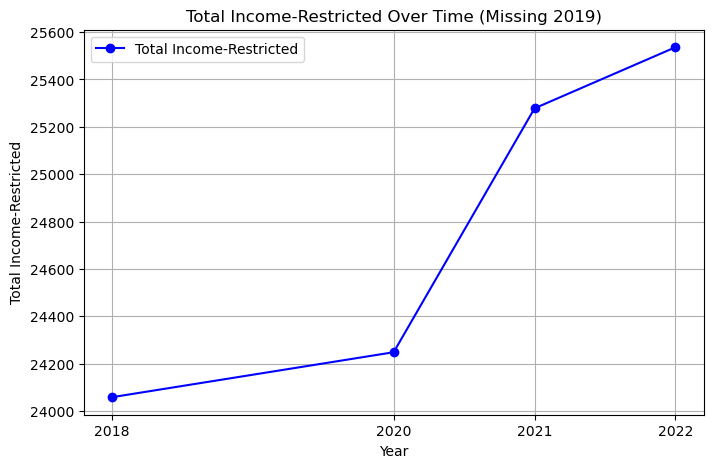

In [12]:
import matplotlib.pyplot as plt

totals = {
    2018: income_2018_cleaned["Total_Income-Restricted"].sum(),
    2020: income_2020_cleaned["Total_Income-Restricted"].sum(),
    2021: income_2021_cleaned["Total_Income-Restricted"].sum(),
    2022: income_2022_cleaned["Total_Income-Restricted"].sum(),
}

plt.figure(figsize=(8, 5))
plt.plot(list(totals.keys()), list(totals.values()), marker="o", linestyle="-", color="b", label="Total Income-Restricted")

plt.title("Total Income-Restricted Over Time (Missing 2019)")
plt.xlabel("Year")
plt.ylabel("Total Income-Restricted")
plt.xticks(list(totals.keys())) 
plt.grid(True)
plt.legend()
#plt.ylim(20000, 30000)

plt.show()

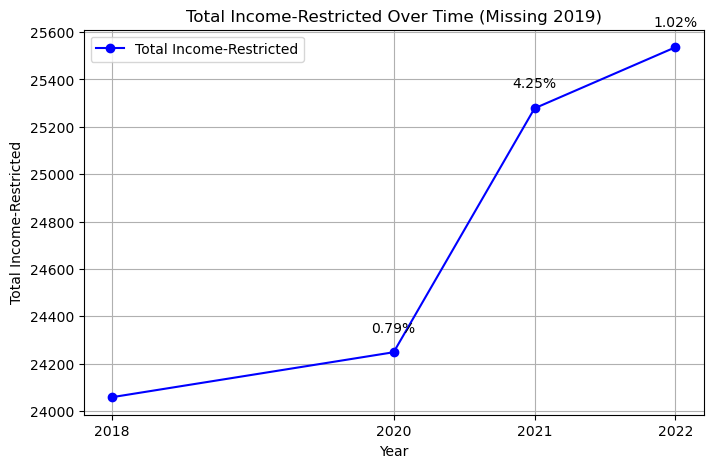

In [13]:
import matplotlib.pyplot as plt

# Calculate total income for each year
totals = {
    2018: income_2018_cleaned["Total_Income-Restricted"].sum(),
    2020: income_2020_cleaned["Total_Income-Restricted"].sum(),
    2021: income_2021_cleaned["Total_Income-Restricted"].sum(),
    2022: income_2022_cleaned["Total_Income-Restricted"].sum(),
}

# Calculate percentage changes
years = list(totals.keys())
values = list(totals.values())
percentage_changes = [None]  # First year has no previous year to compare

for i in range(1, len(values)):
    change = ((values[i] - values[i - 1]) / values[i - 1]) * 100
    percentage_changes.append(change)

# Plotting the data
plt.figure(figsize=(8, 5))
plt.plot(years, values, marker="o", linestyle="-", color="b", label="Total Income-Restricted")

# Add percentage change annotations with a higher placement
for i in range(1, len(years)):
    plt.text(years[i], values[i] + (0.003 * values[i]), f"{percentage_changes[i]:.2f}%", fontsize=10, ha='center', va='bottom')

# Customize plot
plt.title("Total Income-Restricted Over Time (Missing 2019)")
plt.xlabel("Year")
plt.ylabel("Total Income-Restricted")
plt.xticks(years) 
plt.grid(True)
plt.legend()

# Show plot
plt.show()


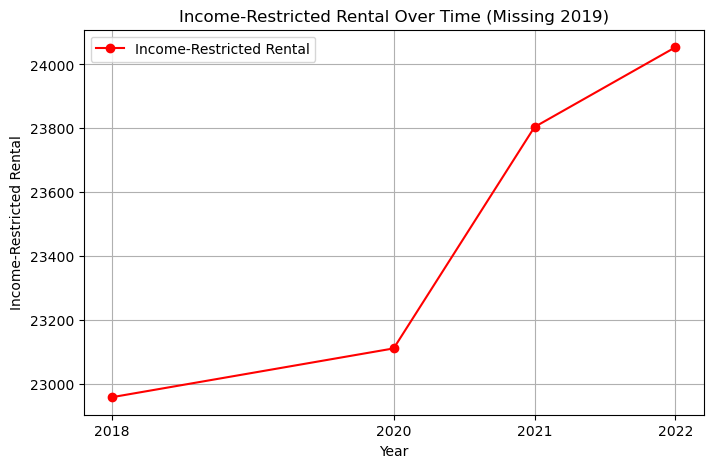

In [14]:
totals_rental = {
    2018: income_2018_cleaned["Income-Restricted_Rental"].sum(),
    2020: income_2020_cleaned["Income-Restricted_Rental"].sum(),
    2021: income_2021_cleaned["Income-Restricted_Rental"].sum(),
    2022: income_2022_cleaned["Income-Restricted_Rental"].sum(),
}

plt.figure(figsize=(8, 5))
plt.plot(list(totals_rental.keys()), list(totals_rental.values()), marker="o", linestyle="-", color="r", label="Income-Restricted Rental")


plt.title("Income-Restricted Rental Over Time (Missing 2019)")
plt.xlabel("Year")
plt.ylabel("Income-Restricted Rental")
plt.xticks(list(totals_rental.keys())) 
plt.grid(True)
plt.legend()
#plt.ylim(20000, 30000)

plt.show()

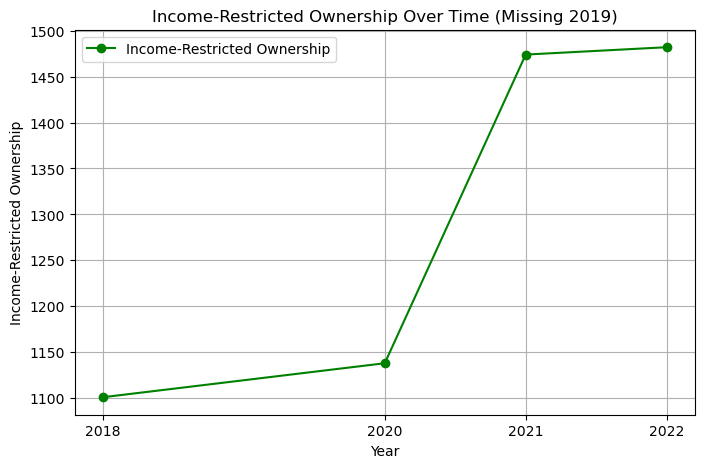

In [15]:
totals_ownership = {
    2018: income_2018_cleaned["Income-Restricted_Ownership"].sum(),
    2020: income_2020_cleaned["Income-Restricted_Ownership"].sum(),
    2021: income_2021_cleaned["Income-Restricted_Ownership"].sum(),
    2022: income_2022_cleaned["Income-Restricted_Ownership"].sum(),
}

plt.figure(figsize=(8, 5))
plt.plot(list(totals_ownership.keys()), list(totals_ownership.values()), marker="o", linestyle="-", color="g", label="Income-Restricted Ownership")

plt.title("Income-Restricted Ownership Over Time (Missing 2019)")
plt.xlabel("Year")
plt.ylabel("Income-Restricted Ownership")
plt.xticks(list(totals_ownership.keys())) 
plt.grid(True)
plt.legend()
#plt.ylim(20000, 30000)

plt.show()

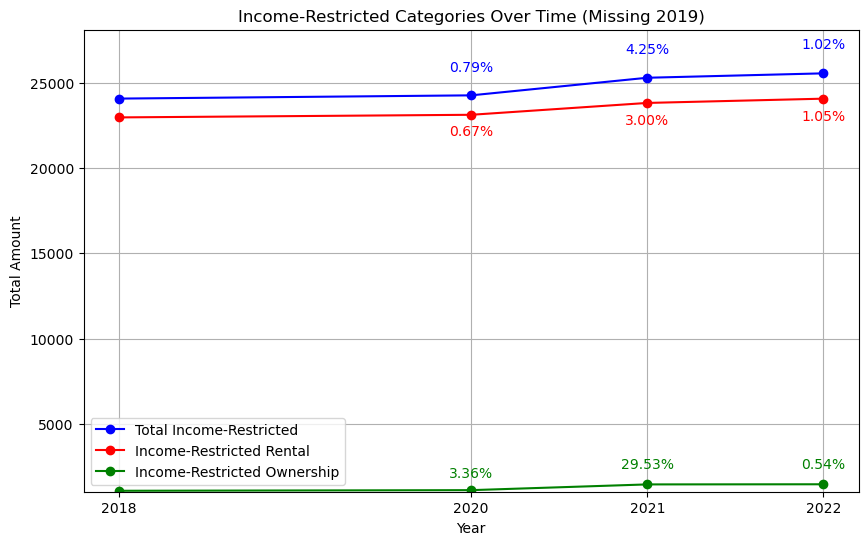

In [16]:
import matplotlib.pyplot as plt

# Helper function to calculate percentage changes
def calculate_percentage_changes(values):
    percentage_changes = [None]  # First year has no previous year to compare
    for i in range(1, len(values)):
        change = ((values[i] - values[i - 1]) / values[i - 1]) * 100
        percentage_changes.append(change)
    return percentage_changes

# Data for Total Income-Restricted
totals = {
    2018: income_2018_cleaned["Total_Income-Restricted"].sum(),
    2020: income_2020_cleaned["Total_Income-Restricted"].sum(),
    2021: income_2021_cleaned["Total_Income-Restricted"].sum(),
    2022: income_2022_cleaned["Total_Income-Restricted"].sum(),
}

years = list(totals.keys())
total_values = list(totals.values())
total_percentage_changes = calculate_percentage_changes(total_values)

# Data for Income-Restricted Rental
totals_rental = {
    2018: income_2018_cleaned["Income-Restricted_Rental"].sum(),
    2020: income_2020_cleaned["Income-Restricted_Rental"].sum(),
    2021: income_2021_cleaned["Income-Restricted_Rental"].sum(),
    2022: income_2022_cleaned["Income-Restricted_Rental"].sum(),
}

rental_values = list(totals_rental.values())
rental_percentage_changes = calculate_percentage_changes(rental_values)

# Data for Income-Restricted Ownership
totals_ownership = {
    2018: income_2018_cleaned["Income-Restricted_Ownership"].sum(),
    2020: income_2020_cleaned["Income-Restricted_Ownership"].sum(),
    2021: income_2021_cleaned["Income-Restricted_Ownership"].sum(),
    2022: income_2022_cleaned["Income-Restricted_Ownership"].sum(),
}

ownership_values = list(totals_ownership.values())
ownership_percentage_changes = calculate_percentage_changes(ownership_values)

# Plotting all data on the same plot
plt.figure(figsize=(10, 6))

# Plot Total Income-Restricted
plt.plot(years, total_values, marker="o", linestyle="-", color="b", label="Total Income-Restricted")
for i in range(1, len(years)):  # Add percentage change annotations for Total Income-Restricted
    plt.text(years[i], total_values[i] + (0.05 * total_values[i]), f"{total_percentage_changes[i]:.2f}%", fontsize=10, color='b', ha='center', va='bottom')

# Plot Income-Restricted Rental
plt.plot(years, rental_values, marker="o", linestyle="-", color="r", label="Income-Restricted Rental")
for i in range(1, len(years)):  # Add percentage change annotations for Rental
    plt.text(years[i], rental_values[i] + (-0.06 * rental_values[i]), f"{rental_percentage_changes[i]:.2f}%", fontsize=10, color='r', ha='center', va='bottom')

# Plot Income-Restricted Ownership
plt.plot(years, ownership_values, marker="o", linestyle="-", color="g", label="Income-Restricted Ownership")
for i in range(1, len(years)):  # Add percentage change annotations for Ownership
    plt.text(years[i], ownership_values[i] + (0.50 * ownership_values[i]), f"{ownership_percentage_changes[i]:.2f}%", fontsize=10, color='g', ha='center', va='bottom')

# Customize plot
plt.title("Income-Restricted Categories Over Time (Missing 2019)")
plt.xlabel("Year")
plt.ylabel("Total Amount")
plt.xticks(years)
plt.grid(True)

# Dynamically adjust y-limits based on the full range of all values
all_values = total_values + rental_values + ownership_values
plt.ylim(min(all_values) * 0.95, max(all_values) * 1.10)

# Add legend
plt.legend()

# Show plot
plt.show()

In [17]:
def cleaning_sector_8(df):
    df = df.copy()
    df["Section_8"] = df["Section_8"].map({np.nan: 0, "Y": 1, "MHP": 0})
    return df


income_dfs_cleaned = [income_2018_cleaned, income_2020_cleaned, income_2021_cleaned, income_2022_cleaned]
income_2018_final, income_2020_final, income_2021_final, income_2022_final = [cleaning_sector_8(df) for df in income_dfs_cleaned]
    

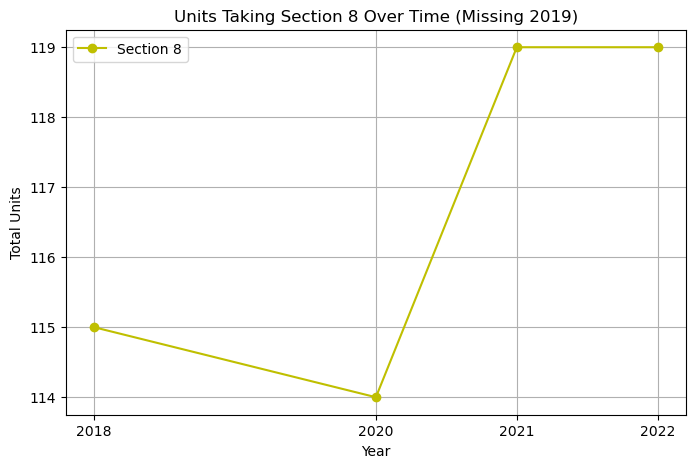

In [18]:
import matplotlib.pyplot as plt

section_8 = {
    2018: income_2018_final["Section_8"].sum(),
    2020: income_2020_final["Section_8"].sum(),
    2021: income_2021_final["Section_8"].sum(),
    2022: income_2022_final["Section_8"].sum(),
}

plt.figure(figsize=(8, 5))
plt.plot(list(section_8.keys()), list(section_8.values()), marker="o", linestyle="-", color="y", label="Section 8")

plt.title("Units Taking Section 8 Over Time (Missing 2019)")
plt.xlabel("Year")
plt.ylabel("Total Units")
plt.xticks(list(section_8.keys())) 
plt.grid(True)
plt.legend()

plt.show()

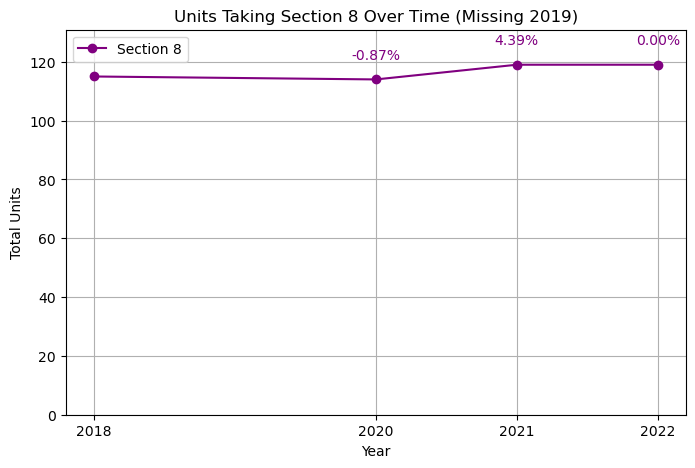

In [19]:
import matplotlib.pyplot as plt

# Helper function to calculate percentage changes
def calculate_percentage_changes(values):
    percentage_changes = [None]  # First year has no previous year to compare
    for i in range(1, len(values)):
        change = ((values[i] - values[i - 1]) / values[i - 1]) * 100
        percentage_changes.append(change)
    return percentage_changes

# Data for Section 8
section_8 = {
    2018: income_2018_final["Section_8"].sum(),
    2020: income_2020_final["Section_8"].sum(),
    2021: income_2021_final["Section_8"].sum(),
    2022: income_2022_final["Section_8"].sum(),
}

years = list(section_8.keys())
section_8_values = list(section_8.values())
section_8_percentage_changes = calculate_percentage_changes(section_8_values)

# Plotting Section 8 data with percentage changes
plt.figure(figsize=(8, 5))
plt.plot(years, section_8_values, marker="o", linestyle="-", color="#800080", label="Section 8")

# Add percentage change annotations
for i in range(1, len(years)):
    plt.text(years[i], section_8_values[i] + (0.05 * section_8_values[i]), f"{section_8_percentage_changes[i]:.2f}%", fontsize=10, color="#800080", ha='center', va='bottom')

# Customize plot
plt.title("Units Taking Section 8 Over Time (Missing 2019)")
plt.xlabel("Year")
plt.ylabel("Total Units")
plt.xticks(years)
plt.grid(True)
plt.legend()

# Dynamically adjust y-limits based on the full range of values
plt.ylim(0, max(section_8_values) * 1.10)

# Show plot
plt.show()


The analysis of income-restricted housing in Boston reveals significant trends over the observed periods. From 2018 to 2020, there was a slight decline in units participating in the Section 8 program, with a decrease of 0.87%. However, a marked turnaround occurred in 2021, with a notable increase of 4.39% in units, indicating a growing need for income-restricted housing during that year. This trend remained stable into 2022, with no further changes in the number of units, maintaining a count of 124.

In terms of income-restricted categories, both rental and ownership units exhibited distinct trajectories. The total income-restricted housing units (Blue) demonstrated a gradual increase, highlighted by a significant rise of 4.25% in 2021. Similarly, the income-restricted rental units (Red) followed suit, growing by 3.00% during the same period. The most striking change, however, was observed in income-restricted ownership units (Green), which experienced an extraordinary increase of 29.53% in 2021.

Overall, the data underscores a robust demand for income-restricted housing in Boston, particularly in 2021, suggesting that policy interventions or market shifts may be influencing these trends. Continued monitoring and analysis will be crucial to understand the factors driving these changes and to inform future housing policies aimed at meeting the needs of Boston's residents.